# Imports

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

# Data Ingestion/ Description

In [2]:
df = pd.read_csv(r"C:\Users\c45526\OneDrive - Textron\College\Grad School\Spring 2025\INFO-513\Homework\Mid_Project\encoded_data.csv")

In [3]:
sample_data = df.head(6)
display(sample_data)

,Unnamed: 0,Customer Type,Customer,Date Invoiced,Order #,item,item_encoded
0,0,Regular,25504,2022-01-12 00:00:00,1304,0,0
1,1,Regular,25504,2022-01-12 00:00:00,1305,1,1
2,2,Regular,25504,2022-01-12 00:00:00,1305,2,2
3,3,Regular,25504,2022-01-12 00:00:00,1305,3,3
4,4,Regular,25504,2022-01-13 00:00:00,1304,4,4
5,5,Regular,25504,2022-01-13 00:00:00,1304,5,5


In [4]:
df.describe()

,Unnamed: 0,Customer,Order #,item,item_encoded
count,1.571286e+06,1.571286e+06,1.571286e+06,1.571286e+06,1.571286e+06
mean,7.856425e+05,2.550855e+04,1.313490e+03,1.609200e+04,1.609200e+04
std,4.535913e+05,1.896326e+00,1.345893e+01,1.760503e+04,1.760503e+04
min,0.000000e+00,2.550400e+04,1.232000e+03,0.000000e+00,0.000000e+00
25%,3.928212e+05,2.550700e+04,1.308000e+03,3.286000e+03,3.286000e+03
50%,7.856425e+05,2.551000e+04,1.312000e+03,9.572000e+03,9.572000e+03
75%,1.178464e+06,2.551000e+04,1.315000e+03,2.271900e+04,2.271900e+04
max,1.571285e+06,2.551100e+04,1.381000e+03,8.633000e+04,8.633000e+04


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571286 entries, 0 to 1571285
Data columns (total 7 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Unnamed: 0     1571286 non-null  int64 
 1   Customer Type  1571286 non-null  object
 2   Customer       1571286 non-null  int64 
 3   Date Invoiced  1571286 non-null  object
 4   Order #        1571286 non-null  int64 
 5   item           1571286 non-null  int64 
 6   item_encoded   1571286 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 83.9+ MB


# Cleaning/Dropping Data

In [6]:
cleandf = df.drop(columns=["Unnamed: 0","item_encoded"]) # dropping the columns I left from my encoding.

In [7]:
cleandf['Date Invoiced']=pd.to_datetime(cleandf['Date Invoiced']) #Changing the order date to a date time if its not

# Summary Stats

In [8]:
summary_stats = {
    "unique_customers": cleandf['Customer'].nunique(),
    "unique_customer_types": cleandf['Customer Type'].nunique(),
    "unique_items": cleandf['item'].nunique(),
    "unique_orders": cleandf['Order #'].nunique(),
    "date_range": (cleandf['Date Invoiced'].min(), cleandf['Date Invoiced'].max())
}

In [9]:
top_items = cleandf['item'].value_counts().head(10)
top_items_by_type = cleandf.groupby('Customer Type')['item'].value_counts().groupby(level=0).head(5)

In [10]:
display(summary_stats)

{'unique_customers': 7,
 'unique_customer_types': 3,
 'unique_items': 86331,
 'unique_orders': 90,
 'date_range': (Timestamp('2022-01-07 00:00:00'),
  Timestamp('2025-01-10 00:00:00'))}

> Above we can see that we can see that in this dataset, we have 7 unique or different kinds of customers, as well as 3 customer types( Regular, Service Center, and Special Programs), the orders span from January 7th 2022 to Janurary 10th of this year.

In [11]:
display(top_items,top_items_by_type)

item
1303    2666
1611    1962
1009    1860
1010    1779
1035    1771
4385    1744
43      1669
787     1658
1535    1641
1141    1516
Name: count, dtype: int64

Customer Type     item
Regular           1611     963
                  1141     652
                  1303     632
                  1035     615
                  787      595
Service Center    1303    1193
                  43       856
                  1035     794
                  770      775
                  980      663
Special Programs  1611     949
                  1009     902
                  37       891
                  1303     841
                  419      837
Name: count, dtype: int64

> We can see the results fo the summary stats above, they tell us the top 10 items order regardless of customer/customer type and we can see that item 1303 has the highest amount of orders at 2666 

> Further more when looking at the top 5 items by type we can see the breakout of most items ordered by customer type, If you look at The regular customer type you can see that item 1611 is number one, and we can also seetaht item 1303 had over half of its orders come from the Service Center.

# Frequencies 

In [12]:
item_order_counts = cleandf.groupby('Order #')['item'].count() # Number of Items per order 

cart_distribution = item_order_counts.value_counts().sort_index() # Cart Size distributions

In [13]:
order_customer_type = cleandf.groupby('Order #')['Customer Type'].first()
basket_by_customer_type = pd.DataFrame({
    'order_size':item_order_counts,
    'customer_type':order_customer_type
})

In [14]:
avg_basket_by_customer_type = basket_by_customer_type.groupby('customer_type')['order_size'].agg(['mean','median','count'])

In [15]:
display(basket_by_customer_type, avg_basket_by_customer_type)

,order_size,customer_type
Order #,,
1232,16,Service Center
1233,44,Service Center
1234,26,Service Center
1235,40,Service Center
1236,78,Service Center
...,...,...
1317,117894,Regular
1318,89064,Regular
1379,36,Special Programs


,mean,median,count
customer_type,,,
Regular,25724.180328,322.0,61
Service Center,74.107143,64.0,28
Special Programs,36.000000,36.0,1


> Here we can see that most orders are pretty small, (less than 200 items)

> we can also see that the regular customer category has the majority of the bulk orders, while Service center orders seem relatively consistant with their sizing.


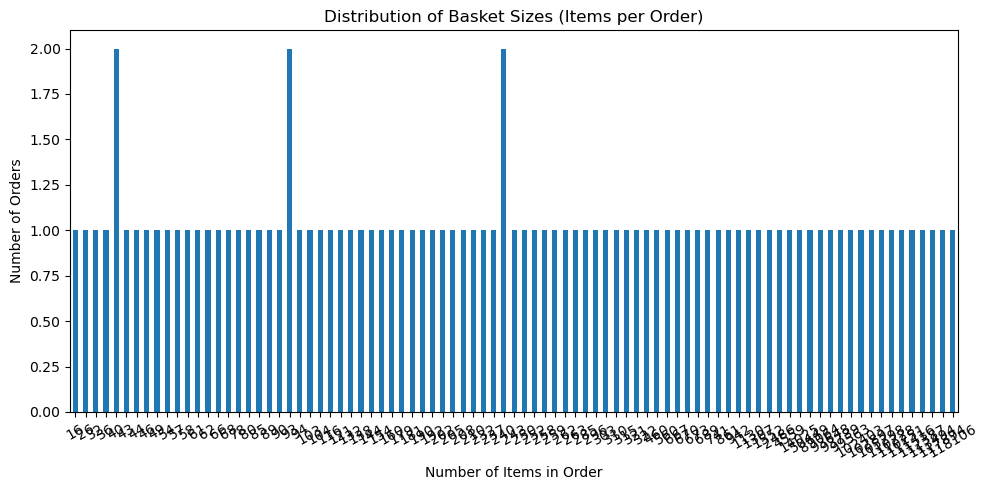

In [50]:
plt.figure(figsize=(10, 5))
cart_distribution.plot(kind='bar')
plt.title("Distribution of Basket Sizes (Items per Order)")
plt.xlabel("Number of Items in Order")
plt.ylabel("Number of Orders")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

# New EDA

In [ ]:
# Reload dataset with all identifiers as strings
df_str = pd.read_csv(r"C:\Users\c45526\OneDrive - Textron\College\Grad School\Spring 2025\INFO-513\Homework\Mid_Project\encoded_data.csv")

In [ ]:

# Clean and format necessary fields
df_str['Date Invoiced'] = pd.to_datetime(df_str['Date Invoiced'])
df_str = df_str.rename(columns={"Order #": "Order", "Customer Type": "Customer_Type"})

In [19]:

# 1. Histogram of number of items per order (log scale), grouped by customer type
order_sizes = df_str.groupby("Order")["item"].count().reset_index(name="items_per_order")
order_customer_type = df_str.groupby("Order")["Customer_Type"].first().reset_index()
order_info = pd.merge(order_sizes, order_customer_type, on="Order")


C:\Users\c45526\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\c45526\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\c45526\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtyp

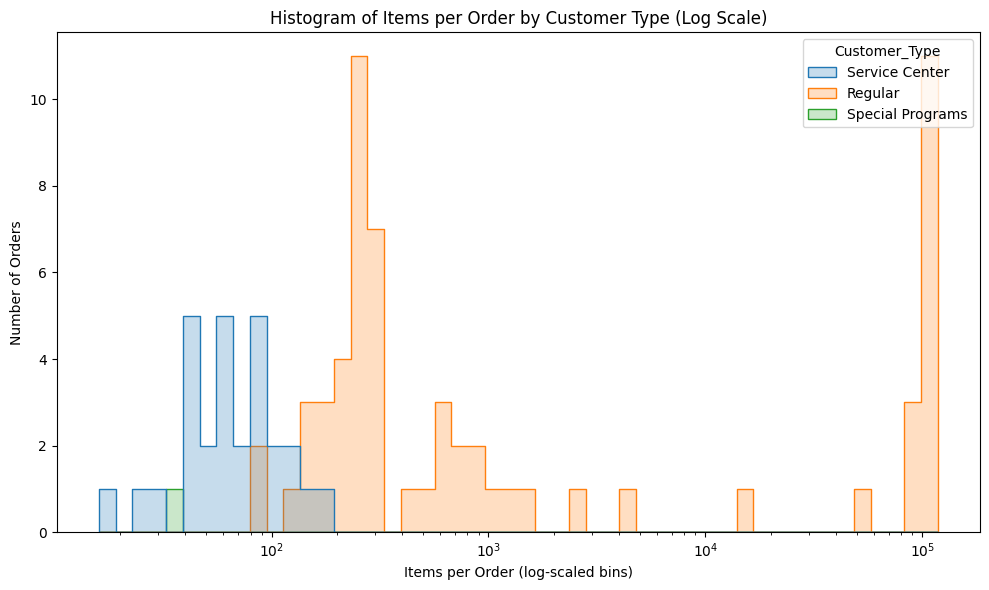

In [ ]:
# Plot
plt.figure(figsize=(10, 6))
sns.histplot(data=order_info, x="items_per_order", hue="Customer_Type", bins=50, log_scale=(True, False), element="step", palette="tab10")
plt.title("Histogram of Items per Order by Customer Type (Log Scale)")
plt.xlabel("Items per Order (log-scaled bins)")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()


C:\Users\c45526\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\c45526\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


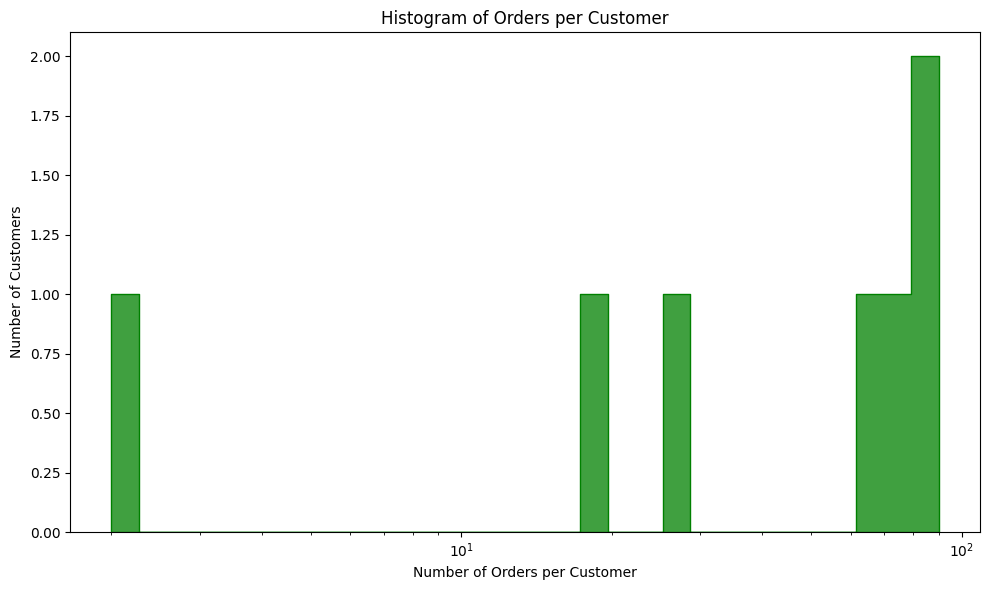

In [ ]:
# Histogram of number of orders per customer
orders_per_customer = df_str.groupby("Customer")["Order"].nunique().reset_index(name="orders_per_customer")
# Plot
plt.figure(figsize=(10, 6))
sns.histplot(orders_per_customer["orders_per_customer"], bins=30, log_scale=(True, False), color="green", element="step")
plt.title("Histogram of Orders per Customer")
plt.xlabel("Number of Orders per Customer")
plt.ylabel("Number of Customers")
plt.tight_layout()
plt.show()


C:\Users\c45526\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\c45526\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


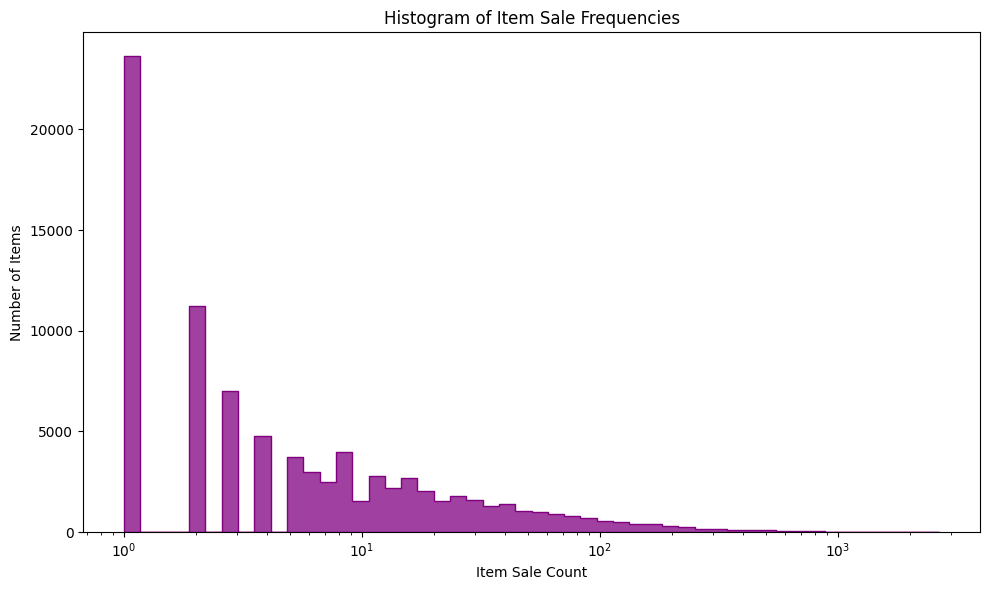

In [ ]:

#Histogram of item sale frequency (log scale)
item_counts = df_str["item"].value_counts()
# Plot
plt.figure(figsize=(10, 6))
sns.histplot(item_counts, bins=50, log_scale=(True, False), color="purple", element="step")
plt.title("Histogram of Item Sale Frequencies")
plt.xlabel("Item Sale Count")
plt.ylabel("Number of Items")
plt.tight_layout()
plt.show()


# Transaction Matrix

In [24]:
# Rename columns for consistency
df = df.rename(columns={"Order #": "Order", "Customer Type": "Customer_Type"})
# Limit to orders with manageable basket sizes (2–100 items)
order_sizes = df.groupby("Order")["item"].count()
reasonable_orders = order_sizes[(order_sizes >= 2) & (order_sizes <= 100)].index
filtered_df = df[df["Order"].isin(reasonable_orders)]

In [25]:
display(filtered_df.head(6))

,Unnamed: 0,Customer_Type,Customer,Date Invoiced,Order,item,item_encoded
73931,73931,Regular,25507,2022-09-05 00:00:00,1258,15586,15586
78684,78684,Regular,25507,2023-02-21 00:00:00,1258,10631,10631
351864,351864,Regular,25510,2023-08-22 00:00:00,1254,50190,50190
599228,599228,Service Center,25507,2022-01-25 00:00:00,1257,10202,10202
599469,599469,Service Center,25507,2022-02-07 00:00:00,1251,8920,8920
599628,599628,Service Center,25507,2022-02-10 00:00:00,1238,6655,6655


In [26]:
# Create the transaction matrix
transaction_matrix = filtered_df.groupby(["Order", "item"]).size().unstack(fill_value=0)
transaction_matrix = transaction_matrix.applymap(lambda x: 1 if x > 0 else 0)

C:\Users\c45526\AppData\Local\Temp\ipykernel_23768\550572195.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  transaction_matrix = transaction_matrix.applymap(lambda x: 1 if x > 0 else 0)


In [27]:
# Add customer type to each order for optional clustering use
order_to_customer_type = df.groupby("Order")["Customer_Type"].first()
transaction_matrix["Customer_Type"] = transaction_matrix.index.map(order_to_customer_type)

In [28]:
X_knn = transaction_matrix.drop(columns=["Customer_Type"])

In [30]:
# Show a preview of the transaction matrix and basic summary without using ace_tools
preview_matrix = transaction_matrix.head()
summary = {
    "total_orders": transaction_matrix.shape[0],
    "total_unique_items": X_knn.shape[1],
    "example_items": X_knn.columns[:10].tolist()
}

preview_matrix, summary


(item   35  43  124  142  144  176  177  182  189  218  ...  64806  64822  \
 Order                                                  ...                 
 1232    0   0    0    0    0    0    0    0    0    0  ...      0      0   
 1233    0   0    0    0    0    0    0    0    0    0  ...      0      1   
 1234    0   0    0    0    0    0    0    0    0    0  ...      0      0   
 1235    0   0    0    0    0    0    0    0    0    1  ...      0      0   
 1236    0   0    0    0    0    0    0    1    0    0  ...      1      0   
 
 item   65174  65423  65921  66061  66065  68137  72332   Customer_Type  
 Order                                                                   
 1232       1      0      0      0      0      0      0  Service Center  
 1233       0      0      0      0      0      0      0  Service Center  
 1234       0      0      0      0      0      0      0  Service Center  
 1235       0      0      0      0      0      0      0  Service Center  
 1236       0  

# KMeans Clustering

In [32]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Adjust n_clusters as needed
transaction_matrix["Cluster"] = kmeans.fit_predict(X_knn)
# Show the first few rows of the transaction matrix with clusters

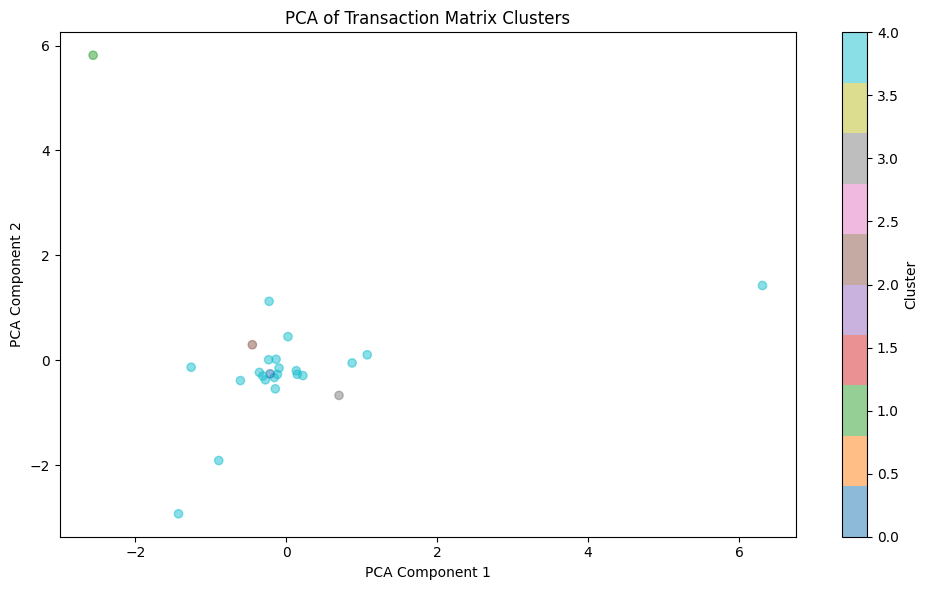

In [33]:
# Visualize clusters using PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_knn)
plt.figure(figsize=(10, 6))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=transaction_matrix["Cluster"], cmap='tab10', alpha=0.5)
plt.title("PCA of Transaction Matrix Clusters")
plt.xlabel("PCA Component 1")  
plt.ylabel("PCA Component 2")
plt.colorbar(scatter, label='Cluster') 
plt.tight_layout()
plt.show()

> The light blue clusters are the densest group, these are most likely the Service center orders that have overlapping itemsets.(makes sense given that alot of service center techs will order parts based on a preliminary diagnos vs and in depth one)

> Other  colers appear to be outliers/subgroups based on small purchasing behavior.

# KNN for finding similar orders

In [46]:
knn_model = NearestNeighbors(n_neighbors=5,metric='cosine') # Using cosine distance for similarity
knn_model.fit(X_knn) # Fit the model to the transaction matrix

NearestNeighbors(metric='cosine')

In [47]:
sample_index = 0
distances, indices = knn_model.kneighbors([X_knn.iloc[sample_index]]) # Find the nearest neighbors for the first order

In [48]:
# Retrieve the nearest neighbors' order numbers and distances
recocmmended_orders = X_knn.iloc[indices[0]]

recocmmended_orders.head()

item,35,43,124,142,144,176,177,182,189,218,...,64613,64806,64822,65174,65423,65921,66061,66065,68137,72332
Order,,,,,,,,,,,,,,,,,,,,,
1232,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1234,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1257,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


> The rows = orders, so each row is one of the most similar orders to order 1232. We did this with using the cosine similariry.

> Cells with a value of 1 indicate that that item was purches in that order while 0 means it was not a part of that order.
for example, Orders 1232,1234,1254, and 1237 do not have item 124.

> You will also notice that item 124 does appear in order 1257, that measn that item number 124 is a potential recommendation for order 1232.

## Recommended Item List

In [ ]:
target_order_vector = X_knn.iloc[sample_index]
neighbor_indices = indices[0][1:]  # exclude the target order itself
neighbors_matrix = X_knn.iloc[neighbor_indices]
neighbor_item_sums = neighbors_matrix.sum(axis=0)
target_items = target_order_vector[target_order_vector == 1].index
potential_recommendations = neighbor_item_sums.drop(labels=target_items)
recommended_items = potential_recommendations[potential_recommendations > 0].sort_values(ascending=False)

# Show top recommended items
recommended_items.head(10)

item
5766     2
1198     2
1010     2
14287    1
13289    1
13697    1
13853    1
14189    1
43       1
12687    1
dtype: int64

> Above we have generated a short list of items and the number orders they can be recommended for. 
The items in this list were not purchased in the original order(index[0]), but were instead found in multiple similar orders, making them very storng candidates for cart completeion suggestions. 
> In the case of Service center Techs, this could speed up their cart allocation process saving them time online that they can instead be spending in the service centers performing maintnance.lets
> Below we can see the same for order #20

In [ ]:
sample_index = 20
target_order_vector = X_knn.iloc[sample_index]
neighbor_indices = indices[0][1:]  # exclude the target order itself
neighbors_matrix = X_knn.iloc[neighbor_indices]

neighbor_item_sums = neighbors_matrix.sum(axis=0)
target_items = target_order_vector[target_order_vector == 1].index
potential_recommendations = neighbor_item_sums.drop(labels=target_items)
recommended_items = potential_recommendations[potential_recommendations > 0].sort_values(ascending=False)

# Show top recommended items
recommended_items.head(10)

item
43       1
12577    1
15277    1
14329    1
14287    1
14189    1
13853    1
13289    1
12605    1
12579    1
dtype: int64